In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
import pandas as pd
data = pd.read_csv("../input/rtb.csv")
print(data.shape)
data.head()

(1000000, 89)


,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,convert
0,-0.01,-0.43,2.22,-0.59,0.80,0.21,-0.19,0.30,-0.25,0.42,...,-0.07,0.30,-0.19,0.61,-0.04,0.36,-0.18,-0.24,0.07,0
1,0.00,-4.11,1.48,0.92,-7.37,0.60,0.37,1.95,0.19,0.85,...,-0.57,-0.27,1.17,-0.52,-1.43,-0.24,-0.41,0.71,-0.22,0
2,0.01,-5.03,-2.78,-0.83,0.92,0.46,0.10,1.36,-0.74,1.62,...,-0.13,0.33,0.38,0.41,-0.61,0.24,-0.10,-1.19,0.37,0
3,-0.02,1.98,2.30,0.87,-7.09,0.36,0.16,1.79,0.23,0.26,...,0.07,0.41,-0.81,-0.49,0.07,-0.20,-0.31,-0.55,0.18,0
4,-0.01,0.14,-2.43,-0.68,0.73,-1.47,0.68,1.93,-0.35,3.12,...,-0.04,0.03,0.07,-0.05,-0.02,-0.01,0.00,-0.20,0.07,0


0    998092
1      1908
Name: convert, dtype: int64

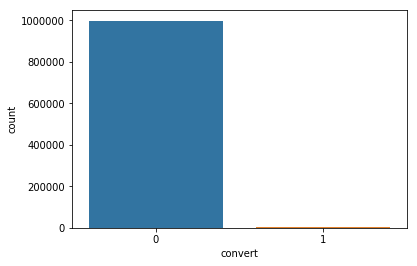

In [3]:
import seaborn as sns
sns.countplot(data.convert)
data.convert.value_counts()

Text(0, 0.5, 'Count')

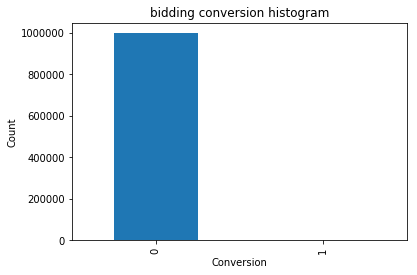

In [4]:
count_classes = pd.value_counts(data['convert'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("bidding conversion histogram")
plt.xlabel("Conversion")
plt.ylabel("Count")

In [5]:
train = data[:800000]
test = data[800000:]

In [6]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(data, test_size=0.2, stratify=data.convert )

In [7]:
train[train.convert==1]

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,convert
859302,-0.01,0.64,-1.78,-0.81,1.01,0.21,-1.37,0.57,-0.36,0.32,...,0.09,-0.66,-0.25,-0.01,0.10,0.02,-0.08,0.22,-0.06,1
610461,-0.02,2.83,-3.62,-0.12,-0.69,2.66,2.58,-0.89,-0.19,-0.70,...,0.03,-0.24,-0.18,0.10,1.34,0.12,0.15,0.18,-0.04,1
276696,-0.01,-1.18,1.99,-0.63,0.79,0.28,0.13,0.50,-0.32,0.96,...,-0.06,-1.41,0.24,0.83,-0.10,0.47,-0.17,0.42,-0.13,1
852433,-0.01,-0.09,-1.73,-0.79,1.01,0.45,0.23,0.72,-0.52,0.59,...,-0.16,-1.43,0.69,0.87,0.26,0.48,-0.04,-0.11,0.03,1
519200,-0.02,2.02,-0.80,0.07,1.51,-4.30,0.28,4.08,-4.17,-3.90,...,-1.36,-0.60,0.46,0.28,-0.05,0.08,-0.01,0.10,0.01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906654,0.02,-7.13,-2.14,-0.50,0.45,1.00,0.52,-1.88,0.29,-4.18,...,-0.21,-0.04,1.14,1.15,0.67,-1.27,-0.13,-1.44,0.41,1
383579,-0.00,2.23,0.36,12.01,1.98,-0.24,-0.09,1.17,-1.04,-1.25,...,-1.94,0.53,-1.27,-0.10,-0.04,-0.06,0.45,0.31,-0.05,1
98291,-0.00,-1.83,-2.66,-0.95,1.06,0.19,-1.14,1.28,-0.61,1.56,...,-0.17,0.30,0.54,0.18,0.69,0.11,-0.07,2.22,-0.68,1
320914,-0.01,-1.79,2.07,-0.52,0.69,0.33,0.09,0.32,-0.23,0.74,...,-0.25,0.73,1.01,-1.07,-1.02,-0.88,-0.26,-1.07,0.32,1


In [8]:
test[test.convert==1]

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,convert
2533,-0.01,-2.27,2.18,-0.47,0.55,0.24,-0.05,-0.47,0.03,-0.59,...,-0.03,-0.30,-0.29,-1.03,0.03,0.22,0.04,-0.89,0.26,1
625930,-0.02,2.12,-0.57,0.13,1.46,-4.29,0.20,3.92,-4.13,-4.19,...,-1.40,-0.25,0.38,0.79,-0.10,0.42,-0.02,-0.02,0.05,1
141655,0.01,-6.40,-2.67,-0.77,0.84,0.58,0.23,1.31,-0.73,1.74,...,0.31,0.37,-1.07,-0.43,-0.71,0.15,-0.10,0.44,-0.14,1
944421,0.01,-4.71,-1.82,-0.59,0.67,0.44,-1.52,-0.12,-0.12,-0.80,...,0.44,-0.07,-1.38,2.10,-1.26,-1.21,-0.06,-0.22,0.06,1
741465,-0.01,0.67,-2.36,-0.69,0.80,-1.42,0.28,1.89,-0.47,2.73,...,-0.06,2.20,0.14,-0.24,-1.02,-0.13,0.04,-0.31,0.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772332,-0.02,2.06,-1.78,-0.88,1.16,0.37,0.47,0.77,-0.54,0.58,...,-0.00,-0.14,-0.03,-0.03,-0.47,-0.05,-0.05,0.28,-0.09,1
233517,-0.01,-0.91,-2.99,1.01,-0.41,-7.07,1.17,3.81,-2.14,-3.88,...,0.08,-1.12,2.47,0.62,-0.39,-1.01,0.12,-0.67,0.22,1
108051,-0.01,-0.73,2.56,-0.40,0.56,0.07,-0.42,-0.27,-0.00,-0.30,...,-0.09,-0.08,0.40,1.47,-0.17,1.48,-0.03,-0.54,0.16,1
898041,0.03,-6.26,-4.91,-0.02,-1.03,-2.13,1.38,1.16,1.20,2.16,...,0.18,0.12,-0.69,0.19,-0.66,0.16,-0.00,-0.37,0.04,1


In [9]:
def undersample(data, ratio=1):
    conv = data[data.convert == 1]
    oth = data[data.convert == 0].sample(n=ratio*len(conv))
    return pd.concat([conv, oth]).sample(frac=1) #shuffle data

ustrain = undersample(train)

y_train = ustrain.convert
X_train = ustrain.drop('convert', axis=1)

print("Remaining rows", len(ustrain))

Remaining rows 3052


In [10]:
from imblearn.keras import balanced_batch_generator

Using TensorFlow backend.


In [11]:
ustrain = undersample(test)
y_test = ustrain.convert
X_test = ustrain.drop('convert', axis=1)

print("Remaining rows", len(ustrain))

Remaining rows 764


In [12]:
from keras import models
from keras import layers
from keras import regularizers
model = models.Sequential()
# kernel_regularizer=regularizers.l2(0.001),

model.add(layers.Dense(12, 
                       activation='relu', input_shape=(88,)))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, 
                       activation='relu'))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
# Recall, F1, Precision
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',              
              metrics=[f1_m, precision_m, recall_m])

In [15]:
from keras import optimizers

model.compile(optimizer=optimizers.Adam(lr=0.01),
             loss='binary_crossentropy',
             metrics=[f1_m, precision_m, recall_m])

In [16]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.Adam(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[f1_m])

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=2)

history = model.fit(X_train,
                   y_train,
                   epochs=30,
                   batch_size=50, callbacks = [es], validation_split=0.2)

Train on 2441 samples, validate on 611 samples
Epoch 1/30
2441/2441 [==============================] - 0s 168us/step - loss: 0.7392 - f1_m: 0.6479 - val_loss: 0.6828 - val_f1_m: 0.6445
Epoch 2/30
2441/2441 [==============================] - 0s 34us/step - loss: 0.6874 - f1_m: 0.6415 - val_loss: 0.6648 - val_f1_m: 0.6449
Epoch 3/30
2441/2441 [==============================] - 0s 34us/step - loss: 0.6654 - f1_m: 0.6269 - val_loss: 0.6528 - val_f1_m: 0.6166
Epoch 4/30
2441/2441 [==============================] - 0s 34us/step - loss: 0.6496 - f1_m: 0.6105 - val_loss: 0.6425 - val_f1_m: 0.6090
Epoch 5/30
2441/2441 [==============================] - 0s 34us/step - loss: 0.6368 - f1_m: 0.6205 - val_loss: 0.6346 - val_f1_m: 0.6232
Epoch 6/30
2441/2441 [==============================] - 0s 36us/step - loss: 0.6265 - f1_m: 0.6176 - val_loss: 0.6296 - val_f1_m: 0.6144
Epoch 7/30
2441/2441 [==============================] - 0s 35us/step - loss: 0.6186 - f1_m: 0.6328 - val_loss: 0.6241 - val_f1_m: 

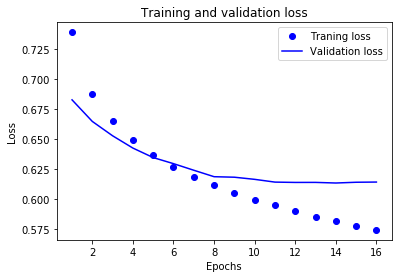

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Traning loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

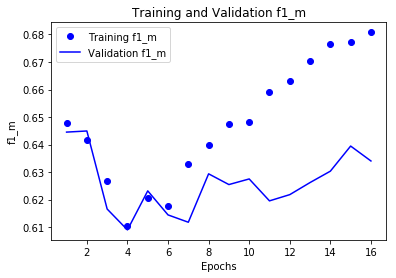

In [19]:
plt.clf()
f1_m = history_dict['f1_m']
val_f1_m = history_dict['val_f1_m']

plt.plot(epochs, f1_m, 'bo', label='Training f1_m')
plt.plot(epochs, val_f1_m, 'b', label='Validation f1_m')
plt.title('Training and Validation f1_m')
plt.xlabel('Epochs')
plt.ylabel('f1_m')
plt.legend()

plt.show()

In [20]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [21]:
from keras import regularizers
model = models.Sequential()
# kernel_regularizer=regularizers.l2(0.001),

model.add(layers.Dense(12,
                       activation='relu', input_shape=(88,)))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, 
                       activation='relu'))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=[f1_m])

from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=2)

model.fit(X_train, y_train, epochs=30, callbacks = [es], batch_size=50)
results = model.evaluate(X_test, y_test)

Epoch 1/30
3052/3052 [==============================] - 0s 82us/step - loss: 0.7068 - f1_m: 0.5331
Epoch 2/30
3052/3052 [==============================] - 0s 32us/step - loss: 0.6736 - f1_m: 0.5515
Epoch 3/30
3052/3052 [==============================] - 0s 32us/step - loss: 0.6548 - f1_m: 0.5997
Epoch 4/30
3052/3052 [==============================] - 0s 31us/step - loss: 0.6403 - f1_m: 0.6084
Epoch 5/30
3052/3052 [==============================] - 0s 31us/step - loss: 0.6295 - f1_m: 0.6348
Epoch 6/30
3052/3052 [==============================] - 0s 32us/step - loss: 0.6207 - f1_m: 0.6170
Epoch 7/30
3052/3052 [==============================] - 0s 31us/step - loss: 0.6141 - f1_m: 0.6301
Epoch 8/30
3052/3052 [==============================] - 0s 30us/step - loss: 0.6087 - f1_m: 0.6398
Epoch 9/30
3052/3052 [==============================] - 0s 32us/step - loss: 0.6040 - f1_m: 0.6441
Epoch 10/30
3052/3052 [==============================] - 0s 32us/step - loss: 0.5997 - f1_m: 0.6503
Epoch 11/

In [22]:
results

[0.690042778459519, 0.6226082444190979]

In [23]:
model.predict(X_test)

array([[0.2922681 ],
       [0.62074554],
       [0.52245855],
       [0.3229946 ],
       [0.09028304],
       [0.26166052],
       [0.57355857],
       [0.32717443],
       [0.8396528 ],
       [0.40669152],
       [0.77409345],
       [0.4779271 ],
       [0.5895128 ],
       [0.63870364],
       [0.24640217],
       [0.43647102],
       [0.45303476],
       [0.55497104],
       [0.67973757],
       [0.21166053],
       [0.56542784],
       [0.27297413],
       [0.07293907],
       [0.47960377],
       [0.08304331],
       [0.7590635 ],
       [0.42706198],
       [0.675534  ],
       [0.14683655],
       [0.22651353],
       [0.9544364 ],
       [0.79310036],
       [0.2613479 ],
       [0.67755646],
       [0.97295415],
       [0.99798036],
       [0.78934747],
       [0.23428696],
       [0.63341355],
       [0.52462465],
       [0.23745388],
       [0.16789052],
       [0.77669954],
       [0.20926663],
       [0.77938503],
       [0.6524025 ],
       [0.58388984],
       [0.627